First notebook file for the project

In [52]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import optimize
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import random

First cell is where I create the graph for Estonian data.
Some of the work such as extracting Estonia data and saving it into new csv file was done before and then deleted.
Graph includes the complete absolute data, as well as a smoothed out version of the data, plots the average values

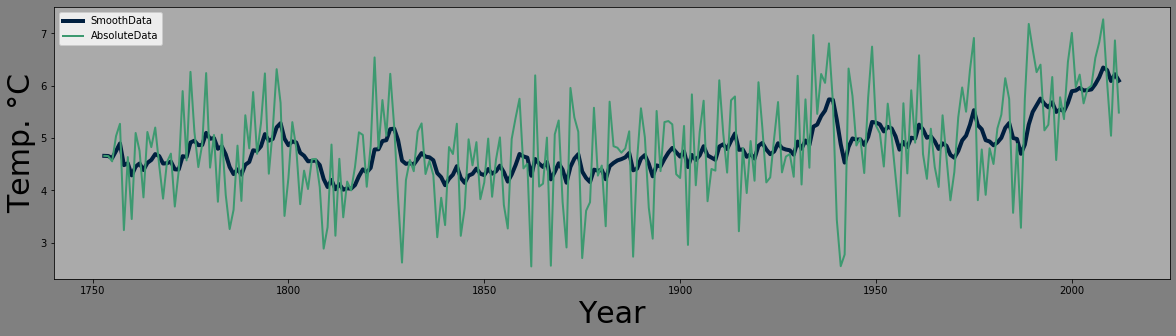

Index(['AverageTemperature'], dtype='object')

In [2]:
#Absolute temperatures, annual readings for Estonia
data_abs_est = pd.read_csv("Estonia.csv",index_col=1, header=0,  parse_dates=True, squeeze=True)
data_est1=data_abs_est.drop(["Unnamed: 0","AverageTemperatureUncertainty","Country"], axis=1)
data_est=data_est1[2:3122]
data_est_year = data_est.groupby([data_est.index.year]).mean()
data_smooth=data_est_year.ewm(com=5).mean()
plt.figure(figsize=(20,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
plt.plot(data_smooth,"#001f3f",linewidth=4,label="SmoothData")
plt.plot(data_est_year,"#3D9970" ,linewidth=2,label="AbsoluteData")
plt.legend()
plt.xlabel("Year",fontsize=30)
plt.ylabel("Temp. °C",fontsize=30)
plt.show()
data_smooth.columns






Next I create the graph for the greenhouse gas emissions of the entire world

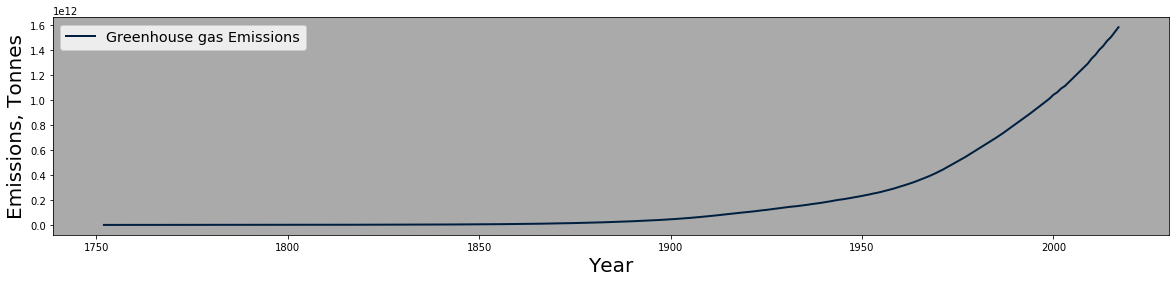

In [56]:
#data_emissions=pd.read_csv("emission data.csv")
#world_emissions1=data_emissions[data_emissions["Country"]=="World"]
#world_emissions2=world_emissions1.transpose()
#world_emissions=world_emissions2[2::]
#a=world_emissions.reset_index()
#a.to_csv("emissions.csv")
data_emissions = pd.read_csv("emissions.csv",index_col=1, header=0)
world_emissions=data_emissions.drop("Unnamed: 0",axis=1)
world_emissions


plt.figure(figsize=(20,4),facecolor="white")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
plt.plot(world_emissions,"#001f3f",linewidth=2,label="Greenhouse gas Emissions")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Emissions, Tonnes",fontsize=20)
plt.legend(fontsize="x-large")
plt.show()





This is where I extract and then plot the data for the entire world average temperature. The data was only up to year 2015, so I manually searched for years 2016-2018 and then inserted them into the dataset.


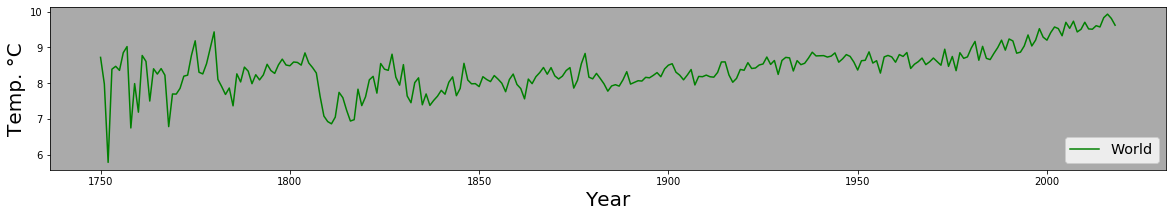

In [31]:
#Absolute temperatures annual global readings
data_absolute=pd.read_csv("GlobalTemperatures.csv",index_col=0, header=0,  parse_dates=True)
data_absolute_1=data_absolute.drop(["LandAverageTemperatureUncertainty","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_1.head()
data_absolute_2=data_absolute.drop(["LandAverageTemperature","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_year = data_absolute_1.groupby([data_absolute_1.index.year]).mean()
data_absolute_year2=data_absolute_year.copy()
data_absolute_year.loc[2016] = [9.93]
data_absolute_year.loc[2017] = [9.81]
data_absolute_year.loc[2018] = [9.62]
data_smooth=data_absolute_year.ewm(com=5).mean()
data_absolute_year_uncertainty = data_absolute_2.groupby([data_absolute_1.index.year]).mean()
plt.figure(figsize=(20,3),facecolor="white")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_absolute_year,"-g", label="World")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Temp. °C",fontsize=20)
ax.legend(loc=4,fontsize="x-large")


plt.show()




This is where I extracted and plotted the uncertainty values of the data. It shows that the data before 1850 is fairly uncertain

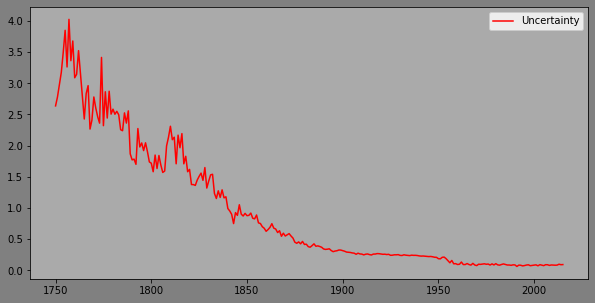

In [5]:
plt.figure(figsize=(10,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_absolute_year_uncertainty,"-r",label="Uncertainty")
ax.legend(loc=1)

When I started looking for additional data sets of world temperature, I saw that most published data is already edited and turned into an "anomaly reading" - So while I couldn't get the actual temperatures, I still used the anomaly readings. The data is taken from 2 independent sources, and shows that their readings are very close to eachother.
Anomaly readings are comparisons of actual data to the calculated average of 20th century - So if a year is 7.5 degrees, it will receive an anomaly reading of -1 degree, because it is 1 degree colder than the 20th century average of 8.5

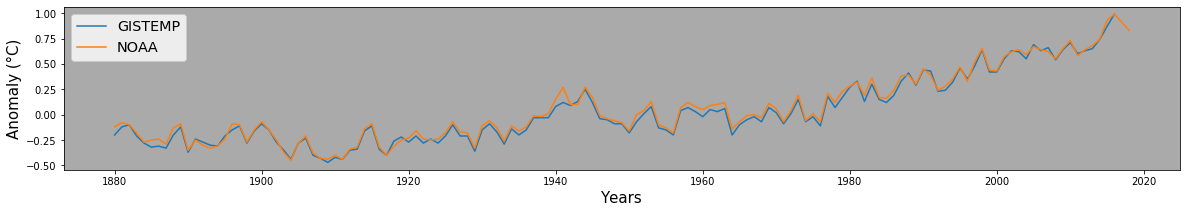

In [32]:
#Temperature variations - temperature readings like these correspond to how different the reading was when compared
#to global average for the years 1900-2000
#Annual readings, 2 independent sources: GISTEMP and NOAA
var_annual=pd.read_csv("annual_csv.csv",index_col=1, header=0)
data_variations_annual=var_annual.iloc[::-1]
data_variations_annual.head()
data_variations_GISTEMP=data_variations_annual[data_variations_annual["Source"]=="GISTEMP"]
data_variations_NOAA=pd.read_csv("data-NOAA.csv",index_col=0, header=0)
data_var_GISTEMP=data_variations_GISTEMP.drop("Source",axis=1)


plt.figure(figsize=(20,3),facecolor="white")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_var_GISTEMP,label="GISTEMP")
ax.plot(data_variations_NOAA,label="NOAA")
plt.xlabel('Years', fontsize=15)
plt.ylabel('Anomaly (°C)', fontsize=15)
plt.legend(fontsize="x-large")
plt.show()


The first attempt at ARIMA models. It didn't work out too well, but I am leaving it in so you can see the work process

In [7]:
#ARIMA model
#autocorrelation_plot(data_var_GCAG)
#model=ARIMA(data_est_year,order=(5,1,1))
#model_fit=model.fit(disp=0)
#print(model_fit.summary())
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#plt.show()
#residuals.plot(kind='kde')
#plt.show()
#print(residuals.describe())

#X = data_est_year.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
#history = [x for x in train]
#predictions = list()
#for t in range(len(test)):
   # model = ARIMA(history, order=(5,1,0))
   # model_fit = model.fit(disp=0)
   # output = model_fit.forecast()
   # yhat = output[0]
   # predictions.append(yhat)
  #  obs = test[t]
 #   history.append(obs)
    
#error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot
#pyplot.plot(test)
#pyplot.plot(predictions, color='red')
#pyplot.show()

Continued work with ARIMA models, this is where I worked out how to use the ARIMA model correctly, and what parameters to use. I cut out the lines of code that do actual work because I later turned this code into a function.

In [ ]:


#from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#plot_acf(data_absolute_year)
#pyplot.show()
#plot_pacf(data_absolute_year)
#pyplot.show()

#ARIMA1=ARIMA(data_absolute_year,order=(5,0,0))
data_test=data_absolute_year[:251]
#ARIMA2=ARIMA(data_test,order=(5,2,0))
plt.figure(figsize=(20,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
arfit=ARIMA2.fit()
pr=arfit.predict(start=251, end=290 )

#forecast = ARIMA1.forecast(steps=25)[0]
#forecast2 = ARIMA2.forecast(steps=25)[0]
ax.plot(data_absolute_year)
pred=[]
year=int(2019)
for i in range(len(forecast)):
    a=[]
    a+=[year]
    a+=[forecast[i]]
    pred+=[a]
    year+=1
pred
arr = np.array(pred)
a=pd.DataFrame(arr)
b=a.set_index(0)
ax.plot(b)

pred1=[]
year1=int(2000)
for i in range(len(forecast2)):
    a=[]
    a+=[year1]
    a+=[forecast2[i]]
    pred1+=[a]
    year1+=1
pred1
arr1 = np.array(pred1)
a1=pd.DataFrame(arr1)
b1=a1.set_index(0)
ax.plot(b1,"r")

ax.plot(pr)





This is where I define the function for ARIMA, so that I could quickly make predictions, starting from any year that I want.
The function takes a training set as the parameter, and then makes a prediction starting from the end year of the training set.

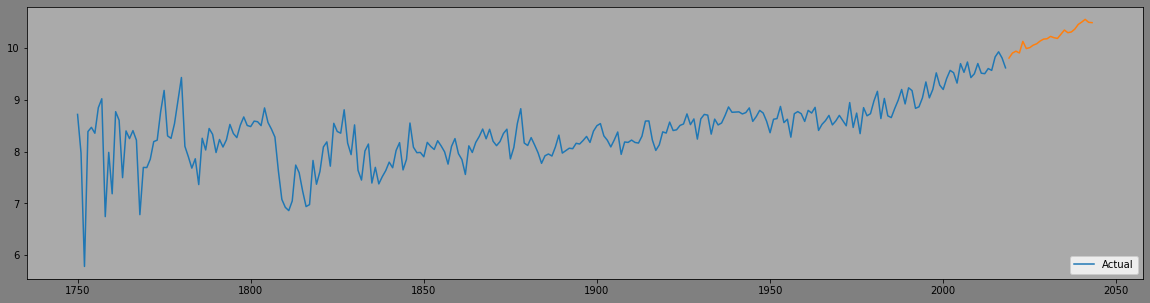

In [57]:
plt.figure(figsize=(20,5),facecolor="gray")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_absolute_year,label="Actual")
test2000=data_absolute_year[30:251]

def prediction(data,p,yr,steps):
    year=yr
    arima=ARIMA(data,order=(p,2,0)).fit(disp=0)
    forecast=arima.forecast(steps=steps)[0]
    pred=[]
    for i in forecast:
        a=[]
        a+=[year]
        a+=[i]
        pred+=[a]
        year+=1
    arr=np.array(pred)
    a=pd.DataFrame(arr)
    b=a.set_index(0)
    return b
        
#ax.plot(prediction(test1900,10,1900,25))


#Prediction2019_p25=prediction(data_absolute_year,25,2019,25)
ax.plot(Prediction2019_p25)
plt.legend(loc=4)
plt.show()


In this cell I use the pickle module to save and load ARIMA modles that take a lot of time to create.

In [43]:
import pickle
pickle.dump(Prediction2019_p25, open("2019-p25", 'wb'))

#loaded_model = pickle.load(open(filename, 'rb'))




Plot for the comparison of predictions using differenrt p values in ARIMA model

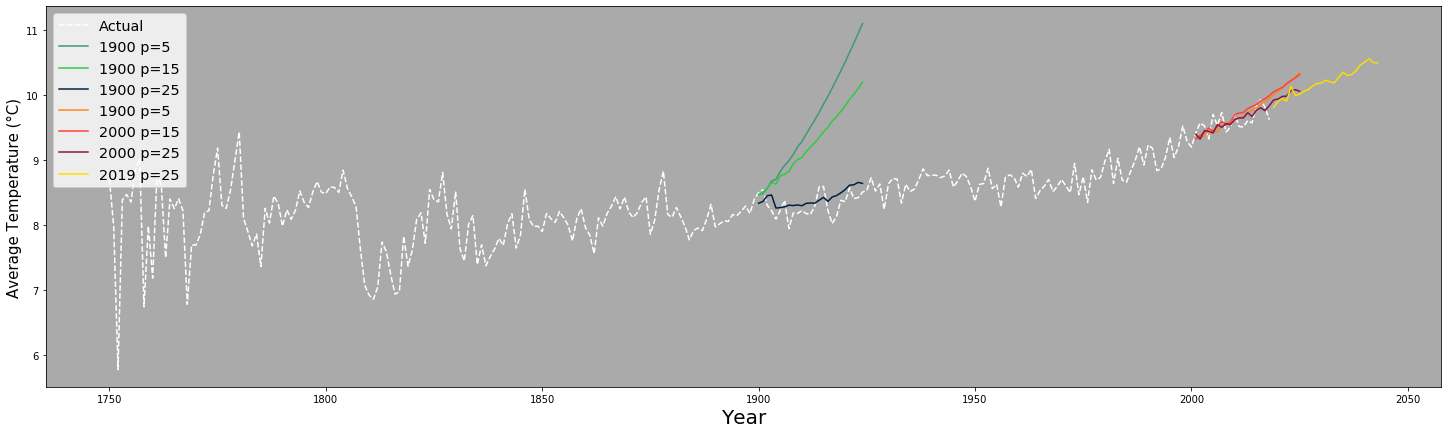

In [55]:
import pickle
#World data and predictions
pred1900_p5=pickle.load(open("1900-p5", 'rb'))
pred1900_p10=pickle.load(open("1900-p10", 'rb'))
pred1900_p15=pickle.load(open("1900-p15", 'rb'))
pred1900_p20=pickle.load(open("1900-p20", 'rb'))
pred1900_p25=pickle.load(open("1900-p25", 'rb'))
pred2000_p5=pickle.load(open("2000-p5", 'rb'))
pred2000_p10=pickle.load(open("2000-p10", 'rb'))
pred2000_p15=pickle.load(open("2000-p15", 'rb'))
pred2000_p20=pickle.load(open("2000-p20", 'rb'))
pred2000_p25=pickle.load(open("2000-p25", 'rb'))
pred2019_p25=pickle.load(open("2019-p25", 'rb'))
plt.figure(figsize=(25,7),facecolor="white")
ax=plt.axes()
ax.set_facecolor("#AAAAAA")
ax.plot(data_absolute_year,"--w",label="Actual")
ax.plot(pred1900_p5,"#3D9970",label="1900 p=5")
ax.plot(pred1900_p15,"#2ECC40",label="1900 p=15")
ax.plot(pred1900_p25,"#001f3f",label="1900 p=25")
ax.plot(pred2000_p5,"#FF851B",label="1900 p=5")
ax.plot(pred2000_p15,"#FF4136",label="2000 p=15")
ax.plot(pred2000_p25,"#85144b",label="2000 p=25")
ax.plot(pred2019_p25,"#FFDC00",label="2019 p=25")
plt.xlabel("Year",fontsize=20)
plt.ylabel("Average Temperature (°C)",fontsize=15)
ax.legend(loc=2,fontsize="x-large")

